***# TALLER 1 METODOS COMPUTACIONALES 2***

***# PUNTO 1)***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


#datos de pureba

ts = np.linspace(0,20,200)
ys = np.sin(ts)



#punto 1
def NUDFT(t_s,y_s,f):
  j = 1j
  return (y_s*np.exp(-(np.pi*2)*(j)*(t_s)*f)).sum()



print("Datos de prueba:"+ str(NUDFT(ts,ys,0.1)))
print("Datos de prueba Norma:" + str(np.abs(NUDFT(ts,ys,0.1))))

Datos de prueba:(10.182890588732711-9.435365325708712j)
Datos de prueba Norma:13.88226853117629


### ***PUNTO 2)***

9.98


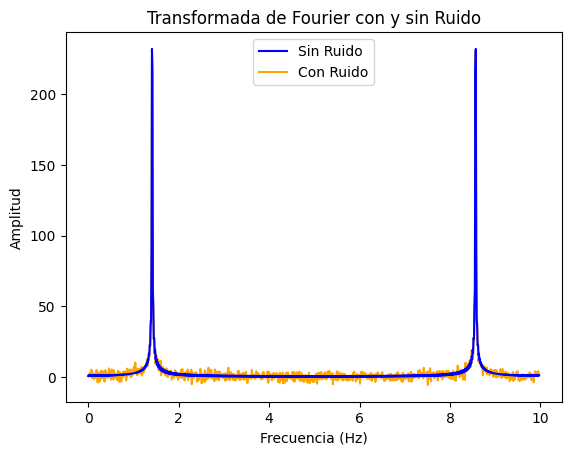

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

t = np.linspace(0,50,500)
y = np.sin((np.pi*2)*((2)**(1/2))*t)

fs = 1/((t[1]-t[0]))
transformada = NUDFT(t,y,fs)
print(fs)

f = np.arange(0,fs,0.01)

lista = []

for a in f:
  fourier = NUDFT(t,y,a)
  norma = np.abs(fourier)
  lista.append(norma)

lista_2 = lista.copy()

lista_2 += np.random.normal(0.0,2,len(lista_2))

plt.plot(f, lista, label="Sin Ruido", color='blue')
plt.plot(f, lista_2, label="Con Ruido", color='orange',zorder=-2)
plt.legend()  # Mostrar la leyenda
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier con y sin Ruido')
plt.show()

**Al agregar ruido a la señal en y podemos ver como esta tiende a tener mas picos  **

## ***PUNTO 3***

[141 358]
El ancho a media altura del pico es: 0.009999999999999787


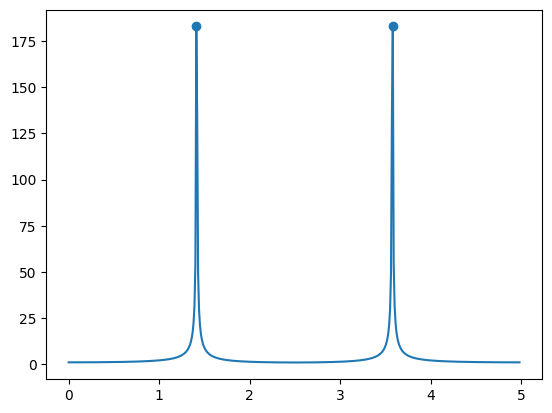

In [ ]:
peaks, _= find_peaks(lista)
print(peaks)

lista_3 = np.array(lista.copy())

plt.scatter(f[peaks],lista_3[peaks])

plt.plot(f,lista)

peak_index = peaks[0]
peak_height = lista[peak_index]

half_height = peak_height / 2

# Encontrar los puntos donde la señal cruza la media altura a izquierda y derecha del pico
left_idx = np.where(y[:peak_index] <= half_height)[0][-1]
right_idx = np.where(y[peak_index:] <= half_height)[0][0] + peak_index

# Interpolar para encontrar las posiciones exactas del cruce
f_left = f[left_idx] + (half_height - lista[left_idx]) / (lista[left_idx+1] - lista[left_idx]) * (f[left_idx+1] - f[left_idx])
f_right = f[right_idx] + (half_height - lista[right_idx-1]) / (lista[right_idx] - lista[right_idx-1]) * (f[right_idx] - f[right_idx-1])


fwhm = f_right - f_left

print(f"El ancho a media altura del pico es: {fwhm}")

-El ancho a media altura del pico es: (0.03587487192106198) cuando tenemos un tMAX = 50 Y UN N = 500
-El ancho a media altura del pico es: (0.009999999999999787) cuando tenemos un N = 500 Y UN TMAX =100. Cambio la posicicon, aumento la posicion   en comparacacion al caso base Tmax = 50 N = 500

-El ancho a media altura del pico es: ( 0.010000000000000009) cuando tenemos un N = 1000 Y UN T MAZ = 50. La posicion no  cambio en comparacion al caso base de tmax 0 50 y N = 500

**# PUNTO 4)**

0.66


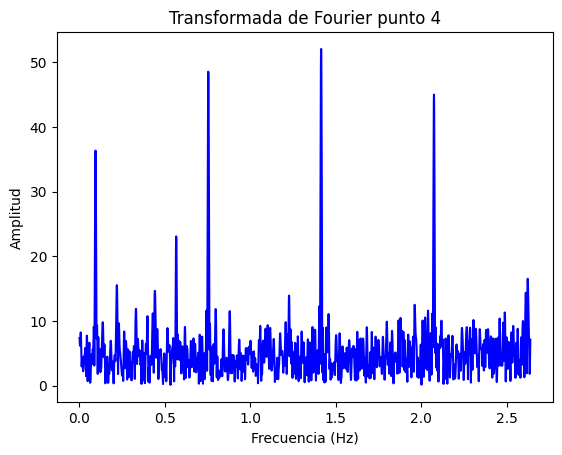

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

t = np.linspace(0,150,100)
t_ruido = t+np.random.normal(0.0,0.1,len(t))
y = np.sin((np.pi*2)*((2)**(1/2))*t_ruido)

fs = 1/((t[1]-t[0]))
print(fs)
lf = 4*fs

f =  np.arange(0,lf,0.001)

lista = []

for a in f:
  fourier = NUDFT(t_ruido,y,a)
  norma = np.abs(fourier)
  lista.append(norma)


plt.plot(f, lista, label="Sin Ruido", color='blue')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier punto 4')
plt.show()




A pesar de que la perturbación en t hace que las muestras se distribuyan en diferentes puntos, esto  es suficiente para superar el límite de Nyquist y recuperar la frecuencia original de la señal.

## ***PUNTO 5***



In [ ]:
import pandas as pd
url = "https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
data = pd.read_csv(url, delim_whitespace=True, header=None, names=['AÑO', 'MES', 'DIA','AMERCIAN SSN'])

df['Fecha'] = pd.to_datetime(df[['AÑO', 'MES', 'DIA']])

plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['AMERICAN SSN'], marker='o', linestyle='-', color='b')
plt.xlabel('Fecha')
plt.ylabel('AMERICAN SSN')
plt.title('AMERICAN SSN a lo largo del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



NameError: name 'df' is not defined